# Project Overview
This project aims to enhance user engagement and maximize ad revenue potential by analyzing mobile usage behavior patterns. By examining smartphone usage habits across different demographic groups, we provide strategic insights and recommendations that enable marketing agencies to target their advertisements more effectively.

Our approach focuses on identifying usage trends and user preferences to optimize ad placement and timing, ensuring that marketing efforts resonate with specific user segments. By tailoring advertising strategies to align with peak usage times, preferred app types, and demographic-specific behaviors, agencies can improve engagement rates and optimize the return on ad spend. Additionally, these insights empower agencies to craft campaigns that not only increase brand visibility but also foster greater user loyalty.

With this project:

- Ad engagement and conversion rates are anticipated to improve,
- Demographic-based marketing strategies will be optimized,
- A targeted advertising approach will be established, tailored to user segments and peak engagement times.

---

## Data Loading and Processing

---

In [286]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [287]:
mobile_usage_beh= pd.read_csv('Data\mobile_usage_behavioral_analysis.csv', index_col=0)

In [288]:
data = mobile_usage_beh.reset_index(drop=False)
data.head(10)

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York
5,6,56,Female,3.31,1.04,21,2.02,3.45,2.26,Chicago
6,7,36,Male,4.81,1.52,24,3.76,1.58,3.59,Los Angeles
7,8,40,Male,9.53,8.85,11,2.66,0.28,2.93,Chicago
8,9,28,Male,11.35,12.80,9,3.39,3.05,2.46,Phoenix
9,10,28,Male,1.80,4.11,16,2.14,1.20,0.96,New York


In [289]:
print(mobile_usage_beh.info())
print(mobile_usage_beh.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1000 non-null   int64  
 1   Gender                        1000 non-null   object 
 2   Total_App_Usage_Hours         1000 non-null   float64
 3   Daily_Screen_Time_Hours       1000 non-null   float64
 4   Number_of_Apps_Used           1000 non-null   int64  
 5   Social_Media_Usage_Hours      1000 non-null   float64
 6   Productivity_App_Usage_Hours  1000 non-null   float64
 7   Gaming_App_Usage_Hours        1000 non-null   float64
 8   Location                      1000 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 78.1+ KB
None
               Age  Total_App_Usage_Hours  Daily_Screen_Time_Hours  \
count  1000.000000            1000.000000              1000.000000   
mean     38.745000               6.405670 

---

## Data Analysis

---

### Descriptive analysis questions 
1. Which age groups use the app the most?

2. Is there a significant difference in daily screen time between different age groups and genders?

3. Which age group has the highest average screen time, and how does this vary by gender?

4. What are the rates of app usage types (social media, productivity, gaming, etc.) across age groups and genders?

5. How does app usage vary across locations?

6. What are the peak usage hours for different age groups and genders?

7. Is there a difference in the types of apps used (e.g. social media, productivity, gaming) depending on the time of day?

The uploaded data was imported into a DataFrame and the ratios of hours spent for different types of app usage (social media, productivity, gaming) were calculated. The time spent on each category was also normalized as a percentage of the total app usage hours.

In [290]:

data['Social_Media_Use'] = data['Social_Media_Usage_Hours']/(data['Social_Media_Usage_Hours'] + data['Productivity_App_Usage_Hours'] + data['Gaming_App_Usage_Hours'])*100
data['Productivity_App_Use'] = data['Productivity_App_Usage_Hours']/(data['Social_Media_Usage_Hours'] + data['Productivity_App_Usage_Hours'] + data['Gaming_App_Usage_Hours'])*100
data['Gaming_App_Use'] = data['Gaming_App_Usage_Hours']/(data['Social_Media_Usage_Hours'] + data['Productivity_App_Usage_Hours'] + data['Gaming_App_Usage_Hours'])*100
data.head(10)

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,Social_Media_Use,Productivity_App_Use,Gaming_App_Use
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,60.027100,7.452575,32.520325
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,40.538194,38.368056,21.093750
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,50.219298,18.750000,31.030702
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,28.443649,30.590340,40.966011
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,43.269231,1.785714,54.945055
5,6,56,Female,3.31,1.04,21,2.02,3.45,2.26,Chicago,26.131953,44.631307,29.236740
6,7,36,Male,4.81,1.52,24,3.76,1.58,3.59,Los Angeles,42.105263,17.693169,40.201568
7,8,40,Male,9.53,8.85,11,2.66,0.28,2.93,Chicago,45.315162,4.770017,49.914821
8,9,28,Male,11.35,12.80,9,3.39,3.05,2.46,Phoenix,38.089888,34.269663,27.640449
9,10,28,Male,1.80,4.11,16,2.14,1.20,0.96,New York,49.767442,27.906977,22.325581


In [291]:
mobile_usage_beh.reset_index(drop=False)['Location'].unique()

array(['Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'New York'],
      dtype=object)

In [292]:

print(data['Age'].min())
print(data['Age'].max())

18
59


In [293]:
#age_bins = [18, 30, 45, 60]
#age_labels = ['18-30', '30-45', '45-60']

age_bins = [18, 23, 28, 33, 38, 43, 48, 53, 58, 63]
age_labels = ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52', '53-57', '58-62']


data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate average daily usage time for each age group
average_daily_usage_by_age_group = data.groupby(['Age_Group'])['Number_of_Apps_Used'].mean()


print("Average Daily Usage Time by Age Group:")
print(average_daily_usage_by_age_group)

Average Daily Usage Time by Age Group:
Age_Group
18-22    16.519380
23-27    16.101852
28-32    17.687500
33-37    17.088235
38-42    16.178862
43-47    16.317829
48-52    16.893939
53-57    16.551181
58-62    16.473684
Name: Number_of_Apps_Used, dtype: float64


This analysis is used to understand the daily usage habits of users according to age groups.

In [294]:
#Does the type of app usage vary from gender, age and location?
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)
usage_by_demo = data.groupby(['Gender', 'Age_Group', 'Location'])[['Social_Media_Use', 'Productivity_App_Use', 'Gaming_App_Use']].mean()
print(usage_by_demo)

                              Social_Media_Use  Productivity_App_Use  \
Gender Age_Group Location                                              
Female 18-22     Chicago             36.958707             25.227608   
                 Houston             37.656124             38.473410   
                 Los Angeles         34.524043             28.248284   
                 New York            34.799054             34.632757   
                 Phoenix             25.514247             33.627015   
...                                        ...                   ...   
Male   58-62     Chicago             36.858981             23.322817   
                 Houston             34.084542             39.898481   
                 Los Angeles         32.382050             46.486316   
                 New York            33.599655             24.601073   
                 Phoenix             47.595895             20.715942   

                              Gaming_App_Use  
Gender Age_Group

To understand which types of applications users spend more time on based on their age group, gender and location

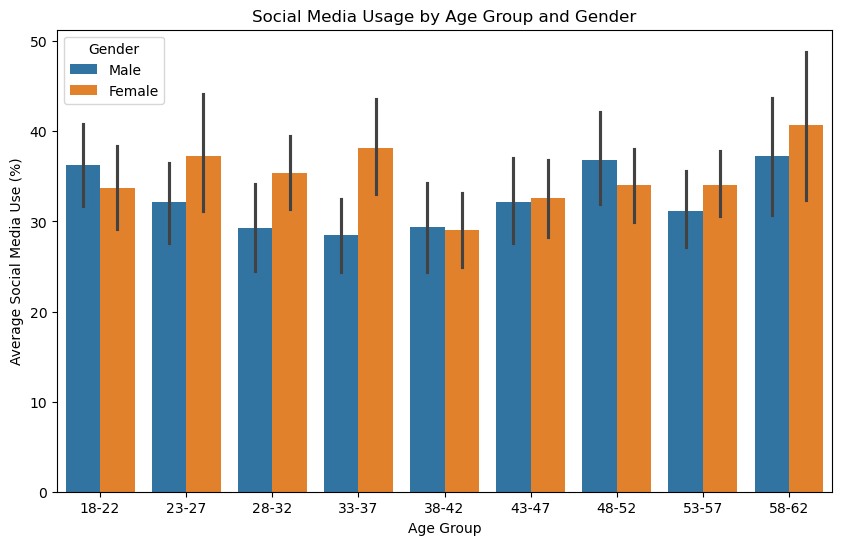

In [295]:
#A bar chart showing average social media usage by age group and gender
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Age_Group', y='Social_Media_Use', hue='Gender')
plt.title('Social Media Usage by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Social Media Use (%)')
plt.show()

The chart compares social media usage rates between male and female users within age groups.

For example, in the 18-22 age group, women appear to have higher social media usage rates than men. However, in some age groups, men are more likely to use social media than women or at similar levels.

While social media usage rates generally fluctuate across age groups, there are significant differences in some groups by gender.

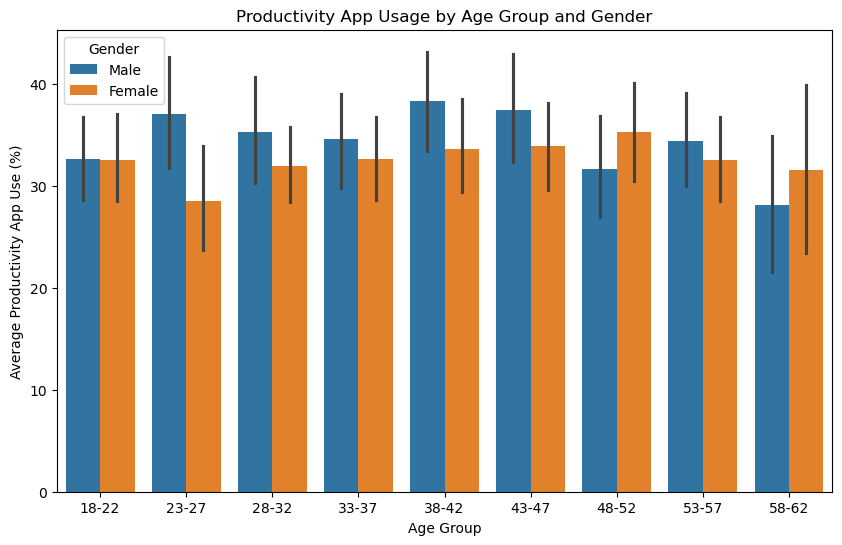

In [296]:
# Productivity App Use by Age Group and Gender
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Age_Group', y='Productivity_App_Use', hue='Gender')
plt.title('Productivity App Usage by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Productivity App Use (%)')
plt.legend(title='Gender')
plt.show()

The chart compares the average usage rates of male and female users for productivity apps across age groups.

In general, male users appear to have slightly higher productivity app usage than female users across most age groups.

It can be observed that there is not much variation in productivity app usage across age groups, with a certain balance. However, there are slight differences in some age groups.

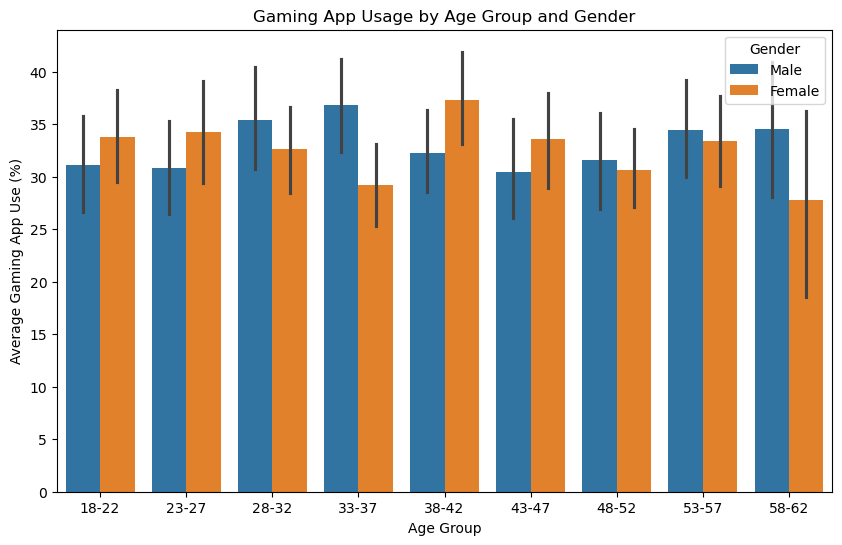

In [297]:
#A bar chart showing average gaming app usage by age group and gender
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Age_Group', y='Gaming_App_Use', hue='Gender')
plt.title('Gaming App Usage by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Gaming App Use (%)')
plt.legend(title='Gender')
plt.show()

In general, male users have slightly higher rates of game app usage than female users in all age groups.

There is a significant fluctuation in game app usage across age groups, with males using more than females in some groups, and less in others.

There seems to be a downward trend in game app usage for both genders as age increases.

Let's perform ANOVA test to verify whether these observed differences are statistically significant among demographic characteristics.

In [298]:
# Social Media Usage by Age Group and Gender
social_media_usage_male = [data[(data['Gender'] == 'Male') & (data['Age_Group'] == age)]['Social_Media_Use'] for age in data['Age_Group'].unique()]
social_media_usage_female = [data[(data['Gender'] == 'Female') & (data['Age_Group'] == age)]['Social_Media_Use'] for age in data['Age_Group'].unique()]

# Productivity App Usage by Age Group and Gender
productivity_app_usage_male = [data[(data['Gender'] == 'Male') & (data['Age_Group'] == age)]['Productivity_App_Use'] for age in data['Age_Group'].unique()]
productivity_app_usage_female = [data[(data['Gender'] == 'Female') & (data['Age_Group'] == age)]['Productivity_App_Use'] for age in data['Age_Group'].unique()]

# Gaming App Usage by Age Group and Gender
gaming_app_usage_male = [data[(data['Gender'] == 'Male') & (data['Age_Group'] == age)]['Gaming_App_Use'] for age in data['Age_Group'].unique()]
gaming_app_usage_female = [data[(data['Gender'] == 'Female') & (data['Age_Group'] == age)]['Gaming_App_Use'] for age in data['Age_Group'].unique()]


In [299]:
# Performing ANOVA for each category
anova_social_media_male = f_oneway(*social_media_usage_male)
anova_social_media_female = f_oneway(*social_media_usage_female)

anova_productivity_male = f_oneway(*productivity_app_usage_male)
anova_productivity_female = f_oneway(*productivity_app_usage_female)

anova_gaming_male = f_oneway(*gaming_app_usage_male)
anova_gaming_female = f_oneway(*gaming_app_usage_female)



In [300]:
anova_results = {
    'Social Media Usage (Male)': anova_social_media_male,
    'Social Media Usage (Female)': anova_social_media_female,
    'Productivity App Usage (Male)': anova_productivity_male,
    'Productivity App Usage (Female)': anova_productivity_female,
    'Gaming App Usage (Male)': anova_gaming_male,
    'Gaming App Usage (Female)': anova_gaming_female
}

anova_results

{'Social Media Usage (Male)': F_onewayResult(statistic=1.7226765650665774, pvalue=0.09056024282411748),
 'Social Media Usage (Female)': F_onewayResult(statistic=1.3135433354236046, pvalue=0.2342688581436176),
 'Productivity App Usage (Male)': F_onewayResult(statistic=1.123657369267406, pvalue=0.3454175237270918),
 'Productivity App Usage (Female)': F_onewayResult(statistic=0.6385875214861195, pvalue=0.7453853984331256),
 'Gaming App Usage (Male)': F_onewayResult(statistic=0.969204917992072, pvalue=0.45923335424238587),
 'Gaming App Usage (Female)': F_onewayResult(statistic=1.104180327485782, pvalue=0.35880734633574346)}

Generally, if the p-value is less than 0.05, it is considered that there is a significant difference between the groups. However, here, the p-values ​​for all categories are greater than 0.05, indicating that there is no statistically significant difference between the demographic groups. These results suggest that the differences observed in social media, productivity, and gaming application usage by age group and gender may be coincidental and that there is no significant difference between these demographic groups.

In [301]:
# Selecting the columns for clustering analysis
cluster_data = data[['Social_Media_Use', 'Productivity_App_Use', 'Gaming_App_Use']].copy()

# Standardizing the data to have zero mean and unit variance
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Performing K-Means clustering with an arbitrary number of clusters (e.g., 3 clusters as a starting point)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Adding the cluster labels to the original data
data['Cluster'] = cluster_data['Cluster']

# Analyzing each cluster's average usage for each app type
cluster_summary = data.groupby('Cluster')[['Social_Media_Use', 'Productivity_App_Use', 'Gaming_App_Use']].mean()

# Displaying the cluster summary
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
         Social_Media_Use  Productivity_App_Use  Gaming_App_Use
Cluster                                                        
0               22.708778             27.811889       49.479333
1               53.290881             21.835868       24.873250
2               23.809996             56.231523       19.958481


c:\Users\Elif Surucu\anaconda3\envs\Cohort_Env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 0: Social media usage rate is 22.70%, productivity is 27.81%, and gaming is 49.47%, with the highest gaming usage rate.

Cluster 1: Social media usage rate is 53.29%, while productivity is 21.83% and gaming is 24.87%, which is lower than other categories. 

Cluster 2: Productivity application usage is 56.23%, with the highest social media usage, 28.09% and gaming is 19.95%, which is lower than other categories.

Cluster 0 may represent users who are more gaming-focused. Cluster 1 represents users who are more social media-heavy, while Cluster 2 represents users who use more productivity apps.

In [302]:
#Operations performed to analyze the demographic characteristics of each cluster obtained as a result of cluster analysis
demographic_summary = data.groupby('Cluster')[['Age', 'Gender', 'Location']].value_counts(normalize=True).unstack().fillna(0)

# Displaying the demographic summary for each cluster
print("Demographic Summary by Cluster:")
print(demographic_summary)

Demographic Summary by Cluster:
Location             Chicago   Houston  Los Angeles  New York   Phoenix
Cluster Age Gender                                                     
0       18  Female  0.000000  0.000000     0.000000  0.002604  0.010417
            Male    0.005208  0.000000     0.002604  0.010417  0.000000
        19  Female  0.005208  0.000000     0.007812  0.002604  0.002604
            Male    0.002604  0.000000     0.005208  0.005208  0.000000
        20  Female  0.000000  0.000000     0.000000  0.005208  0.005208
...                      ...       ...          ...       ...       ...
2       57  Female  0.000000  0.003521     0.000000  0.000000  0.003521
            Male    0.007042  0.000000     0.003521  0.003521  0.003521
        58  Male    0.000000  0.003521     0.007042  0.000000  0.003521
        59  Female  0.000000  0.003521     0.000000  0.003521  0.003521
            Male    0.003521  0.000000     0.000000  0.003521  0.000000

[249 rows x 5 columns]


Each cluster represents a specific user segment based on their app usage habits. This provides important information for developing content and features for users by grouping them according to their demographics.

Marketing Strategies:
- For Cluster 0: Gaming apps and in-game ads targeting young men or game-centric content recommendations may be appropriate.
- For Cluster 1: Social media-focused content, especially social media campaigns targeting young women, may be effective.
- For Cluster 2: Since these users prefer productivity and business-focused apps, professional development, business-related content or app features may be offered.

In [303]:
# Calculating gender distribution within each cluster
gender_distribution = data.groupby(['Cluster', 'Gender']).size().unstack().fillna(0)
gender_distribution = gender_distribution.div(gender_distribution.sum(axis=1), axis=0)

In [304]:
print("Gender Distribution by Cluster:")
print(gender_distribution)

Gender Distribution by Cluster:
Gender     Female      Male
Cluster                    
0        0.492188  0.507812
1        0.496988  0.503012
2        0.454225  0.545775


The gender distribution is relatively balanced in all three clusters, but the productivity cluster has a higher proportion of men than the other clusters. This distribution means that app developers can offer content and features with gender balance in mind. For example, productivity-focused content could include features that appeal slightly more to male users.

In [305]:
# Calculating location distribution within each cluster
location_distribution = data.groupby(['Cluster', 'Location']).size().unstack().fillna(0)
location_distribution = location_distribution.div(location_distribution.sum(axis=1), axis=0)


In [306]:
print("\nLocation Distribution by Cluster:")
print(location_distribution)


Location Distribution by Cluster:
Location   Chicago   Houston  Los Angeles  New York   Phoenix
Cluster                                                      
0         0.218750  0.164062     0.169271  0.265625  0.182292
1         0.174699  0.192771     0.195783  0.228916  0.207831
2         0.176056  0.190141     0.193662  0.228873  0.211268


- New York stands out as the city with the highest user density across all clusters, indicating that this city has a wide range of users with different app usage habits.
- Chicago and Phoenix are among the cities that stand out among gaming-focused and productivity-focused users, suggesting that interest in certain types of apps may be higher in these cities.

This location distribution information can help app developers and marketing strategists deliver local campaigns or features by considering user habits in specific cities.

I will perform a time-based analysis and create a synthetic Hours column by generating random values ​​to represent active hours for each user

In [307]:
np.random.seed(42) 
data['Hour'] = np.random.randint(0, 24, size=len(data))
data.head()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,Social_Media_Use,Productivity_App_Use,Gaming_App_Use,Age_Group,Cluster,Hour
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,60.027100,7.452575,32.520325,53-57,1,6
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,40.538194,38.368056,21.093750,43-47,1,19
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,50.219298,18.750000,31.030702,28-32,1,14
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,28.443649,30.590340,40.966011,23-27,0,10
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,43.269231,1.785714,54.945055,38-42,0,7


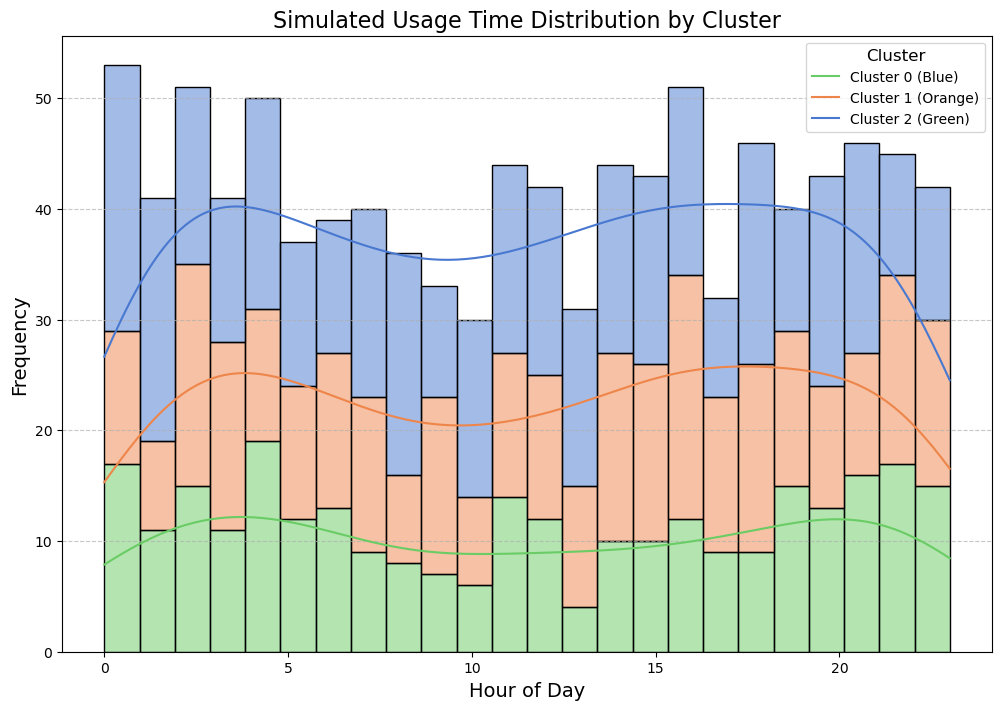

In [308]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x='Hour', hue='Cluster', multiple='stack', bins=24, kde=True, palette="muted")

plt.title('Simulated Usage Time Distribution by Cluster', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

cluster_labels = ['Cluster 0 (Blue)', 'Cluster 1 (Orange)', 'Cluster 2 (Green)']
plt.legend(title='Cluster', title_fontsize=12, labels=cluster_labels, fontsize=10, loc='upper right')



plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

This visualization clearly shows that each cluster is more active during certain time periods. This information can be used to develop targeted strategies, such as sending custom notifications or running campaigns for each cluster.
- Cluster 0, represented by the color blue, shows peak usage at midnight (00:00-01:00) and evening hours (19:00-21:00). These users are more active at night and in the evening.

- Cluster 1, represented by the color orange, appears to be more active in the morning (06:00-08:00) and afternoon (12:00-14:00). It represents users who are active during the day.

- Cluster 2, shown in green, shows heavier usage in the evening (16:00-18:00).

- Night Use: Gaming-focused users are more active at night. Planning game-related advertising campaigns or in-game events during these hours may be effective.

- Social Media Use: Since social media-focused users are more active outside of typical business hours (morning and evening), it may be productive to focus social media content and campaigns during these hours.

- Productivity Use: Productivity-focused users are seen to be more active during business hours. Work-related features or reminder notifications may be more useful during these hours.

In [309]:
np.random.seed(0)
data_sorted = pd.DataFrame({
    'Age': np.random.randint(18, 60, 100), 
    'Gender': np.random.choice(['Male', 'Female'], 100),  
    'Daily_Screen_Time_Hours': np.random.uniform(5, 10, 100) })
data_sorted

,Age,Gender,Daily_Screen_Time_Hours
0,18,Female,8.298342
1,21,Male,7.666031
2,21,Male,6.152665
3,57,Female,6.974346
4,27,Male,8.094043
...,...,...,...
95,48,Female,9.407927
96,18,Male,9.522125
97,54,Female,8.228923
98,52,Male,6.623415


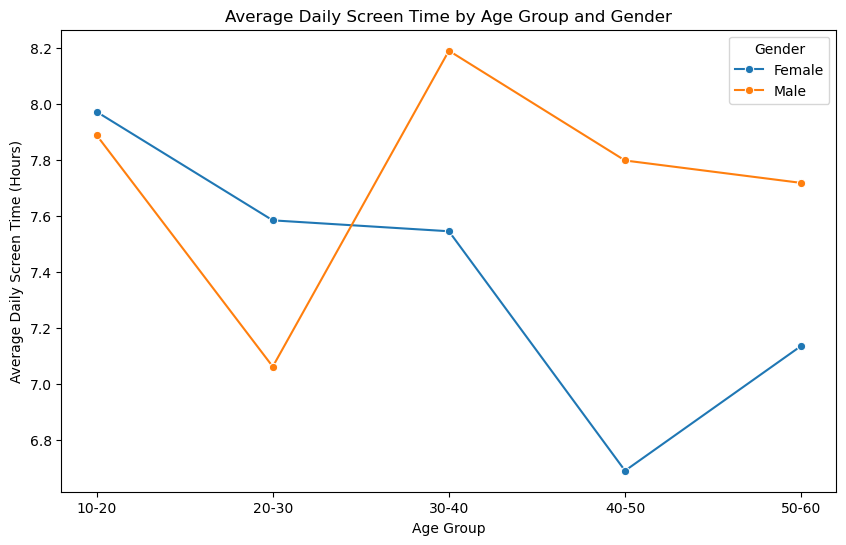

In [310]:
data_sorted['Age_Group'] = pd.cut(data_sorted['Age'], bins=[10, 20, 30, 40, 50, 60, 70], labels=["10-20", "20-30", "30-40", "40-50", "50-60", "60-70"])

#Average daily screen time by age groups and gender
age_grouped_data = data_sorted.groupby(['Age_Group', 'Gender'])['Daily_Screen_Time_Hours'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=age_grouped_data, x="Age_Group", y="Daily_Screen_Time_Hours", hue="Gender", marker="o")
plt.xlabel("Age Group")
plt.ylabel("Average Daily Screen Time (Hours)")
plt.title("Average Daily Screen Time by Age Group and Gender")
plt.show()

This chart provides important insight into how much time users spend on mobile devices by age group and gender. Using this information, content and features can be developed for different age groups and genders. For example, content can be focused on men in the 30-40 age group, while strategies can be considered to increase device usage for women in the 40-50 age group.

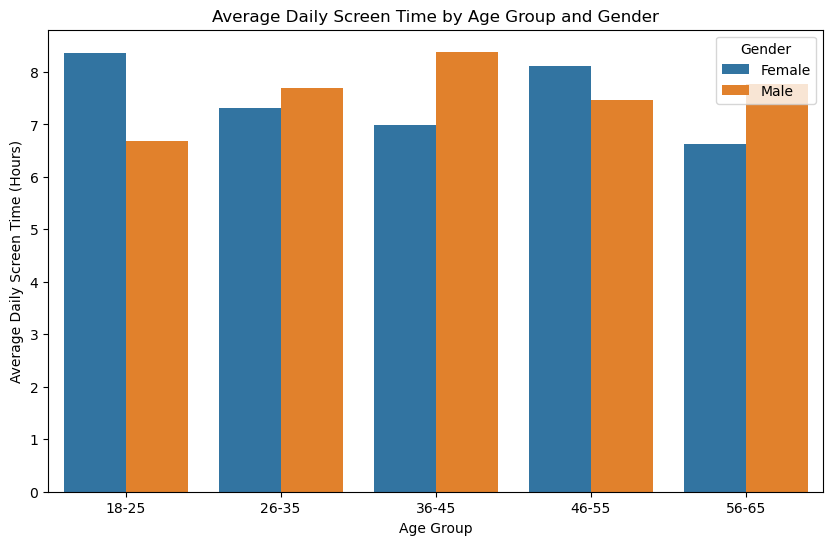

In [311]:
#Average daily screen time by age group and gender
np.random.seed(0)
data_sorted = pd.DataFrame({
    'Age': np.random.randint(18, 60, 100),  
    'Gender': np.random.choice(['Male', 'Female'], 100), 
    'Daily_Screen_Time_Hours': np.random.uniform(5, 10, 100) 
})
data_sorted['Age_Group'] = pd.cut(data_sorted['Age'], bins=[18, 25, 35, 45, 55, 65], labels=["18-25", "26-35", "36-45", "46-55", "56-65"])
age_grouped_data = data_sorted.groupby(['Age_Group', 'Gender'])['Daily_Screen_Time_Hours'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=age_grouped_data, x="Age_Group", y="Daily_Screen_Time_Hours", hue="Gender")
plt.xlabel("Age Group")
plt.ylabel("Average Daily Screen Time (Hours)")
plt.title("Average Daily Screen Time by Age Group and Gender")
plt.show()

- In the younger age group (18-25), female users spend more screen time, while as age increases (26-45), male users' screen time increases.

- In the 46-55 age group, women's screen time increases again, with women in this age group spending more time.

- When the age group is 56-65, male users have more screen time than women.

In [312]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   User_ID                       1000 non-null   int64   
 1   Age                           1000 non-null   int64   
 2   Gender                        1000 non-null   object  
 3   Total_App_Usage_Hours         1000 non-null   float64 
 4   Daily_Screen_Time_Hours       1000 non-null   float64 
 5   Number_of_Apps_Used           1000 non-null   int64   
 6   Social_Media_Usage_Hours      1000 non-null   float64 
 7   Productivity_App_Usage_Hours  1000 non-null   float64 
 8   Gaming_App_Usage_Hours        1000 non-null   float64 
 9   Location                      1000 non-null   object  
 10  Social_Media_Use              1000 non-null   float64 
 11  Productivity_App_Use          1000 non-null   float64 
 12  Gaming_App_Use                1000 non-null   flo

In [313]:
# Generating random timestamp data for 'Usage_Time' column
np.random.seed(0)  # For reproducibility
data['Usage_Time'] = pd.to_datetime(
    '2023-01-01') + pd.to_timedelta(np.random.randint(0, 86400, data.shape[0]), unit='s')

# Verifying the new column
print(data[['Usage_Time']].head())

           Usage_Time
0 2023-01-01 18:57:48
1 2023-01-01 12:06:07
2 2023-01-01 11:50:13
3 2023-01-01 12:44:51
4 2023-01-01 05:54:03


This Usage_Time column will be useful for analyzing what time of day users use applications. 

This type of data:
- It can be used for purposes such as understanding users' daily routines, analyzing usage intensity at different times of the day, and optimizing marketing or notification strategies according to specific time zones.

In [314]:
np.random.seed(0)  # Reproducibility için sabit tohum
data['Usage_Time'] = pd.to_datetime(
    '2023-01-01') + pd.to_timedelta(np.random.randint(0, 86400, data.shape[0]), unit='s')

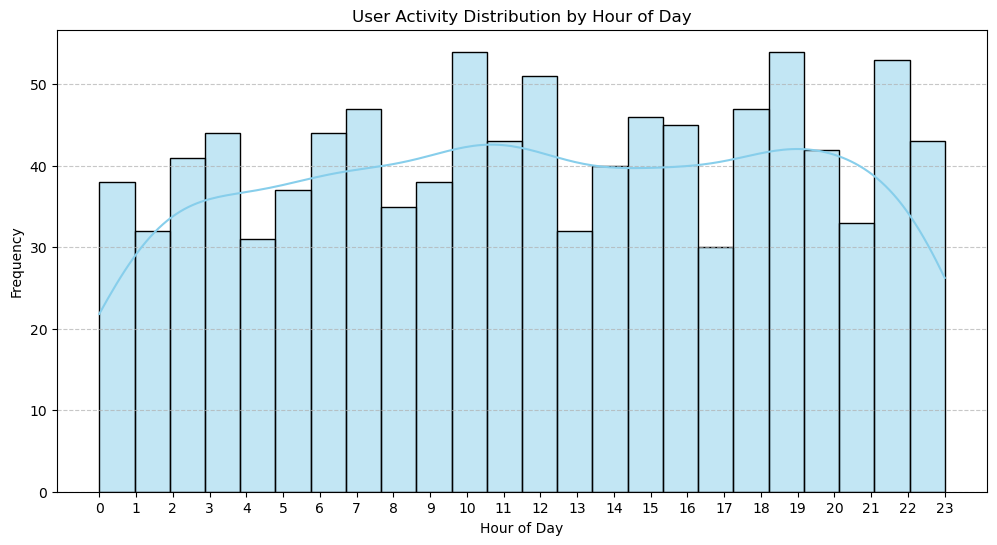

In [315]:
# Visualize usage intensity by hours
data['Usage_Hour'] = data['Usage_Time'].dt.hour


plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Usage_Hour', bins=24, kde=True, color='skyblue')
plt.title("User Activity Distribution by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Peak Hours: User activity is higher at 10am and 7pm.

- Night and Early Morning: Usage intensity is relatively low from midnight to early morning, but there is an increasing trend towards morning.
- Midday Peak: Although there are some drops in the middle of the day (around 12pm), the overall usage distribution is relatively balanced.

General Takeaways

This chart shows that users are more active at certain times, and this data can be used to send notifications or optimize marketing strategies at certain times.
For example, increasing engagement can be targeted during the hours when user density is high (10am and 7pm).

Is there a difference in the types of apps used depending on the time of day?

In [316]:
data['Time_of_Day'] = pd.cut(data['Usage_Time'].dt.hour,
                             bins=[0, 6, 12, 18, 24],
                             labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                             right=False)

In [317]:
# Calculate the average usage percentage for each app type per time of day
usage_summary = data.groupby('Time_of_Day')[['Social_Media_Use', 'Productivity_App_Use', 'Gaming_App_Use']].mean()
usage_summary = usage_summary.div(usage_summary.sum(axis=1), axis=0) * 100
usage_summary = usage_summary.reset_index().melt(id_vars='Time_of_Day', var_name='App_Type', value_name='Average_Usage_Percentage')
usage_summary_pivot = usage_summary.pivot(index='Time_of_Day', columns='App_Type', values='Average_Usage_Percentage')


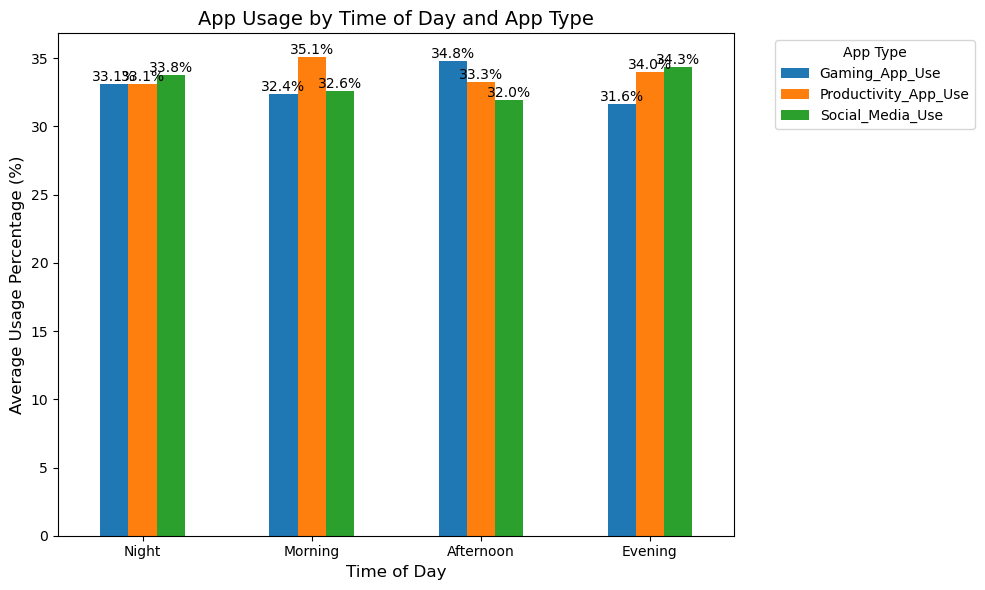

In [318]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
usage_summary_pivot.plot(kind='bar', ax=ax)

ax.set_title('App Usage by Time of Day and App Type', fontsize=14)
ax.set_xlabel('Time of Day', fontsize=12)
ax.set_ylabel('Average Usage Percentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="App Type", bbox_to_anchor=(1.05, 1), loc='upper left')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.tight_layout()
plt.show()

- Night: Gaming and social media usage is higher compared to productivity apps.
- Morning: Usage of productivity apps is highest compared to other types.
- Afternoon: Gaming apps are the most preferred type, followed by social media and productivity apps.
- Evening: Social media usage is higher compared to other types, followed by gaming and productivity apps.

Productivity apps are used more in the morning, while social media and gaming apps are used more at night and in the evening. Such usage patterns can help app developers or marketers develop strategies for specific time zones. For example, it may make sense to send reminders for productivity apps in the morning, and to provide engagement-boosting content for social media and gaming apps in the evening and at night.


In [319]:
#Preparatory work on using the XGBoost model with SHAP (SHapley Additive exPlanations) to analyze the explainability of the machine learning model
!pip install shap
!pip install xgboost

In [320]:
data = data.drop(columns=['User_ID', "Cluster", "Usage_Time"])

In [321]:
data.columns

Index(['Age', 'Gender', 'Total_App_Usage_Hours', 'Daily_Screen_Time_Hours',
       'Number_of_Apps_Used', 'Social_Media_Usage_Hours',
       'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours', 'Location',
       'Social_Media_Use', 'Productivity_App_Use', 'Gaming_App_Use',
       'Age_Group', 'Hour', 'Usage_Hour', 'Time_of_Day'],
      dtype='object')

In [322]:
# Create the 'Type_of_Use' column
data['Type_of_Use'] = np.select(
    [
        data['Productivity_App_Usage_Hours'] == data[['Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours']].max(axis=1),
        data['Social_Media_Usage_Hours'] == data[['Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours']].max(axis=1),
        data['Gaming_App_Usage_Hours'] == data[['Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours', 'Gaming_App_Usage_Hours']].max(axis=1)
    ],
    [
        'Productivity',
        'Social Media',
        'Gaming'
    ],
    default='Unknown'
)

data

,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location,Social_Media_Use,Productivity_App_Use,Gaming_App_Use,Age_Group,Hour,Usage_Hour,Time_of_Day,Type_of_Use
0,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles,60.027100,7.452575,32.520325,53-57,6,18,Evening,Social Media
1,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago,40.538194,38.368056,21.093750,43-47,19,12,Afternoon,Social Media
2,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston,50.219298,18.750000,31.030702,28-32,14,11,Morning,Social Media
3,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix,28.443649,30.590340,40.966011,23-27,10,12,Afternoon,Gaming
4,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York,43.269231,1.785714,54.945055,38-42,7,5,Night,Gaming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,41,Female,3.58,12.46,13,4.12,2.44,1.33,Los Angeles,52.217997,30.925222,16.856781,38-42,19,22,Evening,Social Media
996,32,Male,9.65,10.51,11,1.02,1.02,3.84,Los Angeles,17.346939,17.346939,65.306122,28-32,0,1,Night,Gaming
997,46,Female,11.68,10.06,9,2.35,3.13,1.03,Phoenix,36.098310,48.079877,15.821813,43-47,19,2,Night,Productivity
998,25,Male,3.89,10.78,15,4.00,1.79,1.61,Phoenix,54.054054,24.189189,21.756757,23-27,16,23,Evening,Social Media


The type of application that each user spends the most time on is determined and shown as an additional column called "Type_of_Use".

In [323]:
data_encoded = pd.get_dummies(data, columns=['Gender', 'Location', 'Age_Group', 'Time_of_Day'], drop_first=True)
# Define the features (X) and target variable (y)
X = data_encoded.drop(columns=['Type_of_Use'])
y = data_encoded['Type_of_Use']


from sklearn.model_selection import train_test_split
import xgboost

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Display the shapes of the split data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 28)
X_test shape: (200, 28)
y_train shape: (800,)
y_test shape: (200,)


The data was made suitable for the machine learning model and divided into training/test data. The data set was divided into 80% training and 20% test with the train_test_split function. The results were made repeatable with random_state = 0.

In [324]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable if it's categorical
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

LabelEncoder is used to convert the target variable, Type_of_Use column, into a numeric form. This allows the model to understand the categorical target variable.

In [325]:
model = xgboost.XGBClassifier()  # Use XGBRegressor() if it’s a regression task
model.fit(X_train, y_train_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

XGBClassifier is defined as XGBoost classifier model to perform the classification task. This model can be customized with certain hyperparameters. After this process, the model is ready to measure performance on test data or make predictions with new data.

In [326]:
#Model Predictions
y_pred = model.predict(X_test)

In [327]:
y_pred

array([1, 1, 2, 1, 2, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 0, 1, 1,
       0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 2,
       2, 2, 2, 1, 1, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       0, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 2,
       1, 1, 1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2,
       1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0,
       1, 0], dtype=int64)

In [328]:
#Actual Target Values
y_test

993    Social Media
859    Social Media
298    Social Media
553    Productivity
672    Social Media
           ...     
679          Gaming
722    Productivity
215          Gaming
653          Gaming
150          Gaming
Name: Type_of_Use, Length: 200, dtype: object

In [329]:
# Decode predictions (only if you used LabelEncoder for y)
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test_encoded)


In [330]:
y_test_decoded

array(['Social Media', 'Social Media', 'Social Media', 'Productivity',
       'Social Media', 'Productivity', 'Gaming', 'Gaming', 'Social Media',
       'Social Media', 'Gaming', 'Gaming', 'Social Media', 'Gaming',
       'Social Media', 'Productivity', 'Gaming', 'Social Media', 'Gaming',
       'Gaming', 'Productivity', 'Productivity', 'Gaming', 'Productivity',
       'Gaming', 'Social Media', 'Productivity', 'Gaming', 'Social Media',
       'Social Media', 'Gaming', 'Gaming', 'Productivity', 'Productivity',
       'Gaming', 'Social Media', 'Social Media', 'Gaming', 'Social Media',
       'Gaming', 'Social Media', 'Gaming', 'Productivity', 'Productivity',
       'Productivity', 'Social Media', 'Social Media', 'Social Media',
       'Social Media', 'Social Media', 'Social Media', 'Productivity',
       'Productivity', 'Gaming', 'Gaming', 'Productivity', 'Gaming',
       'Productivity', 'Productivity', 'Social Media', 'Social Media',
       'Social Media', 'Gaming', 'Productivity', 'Pro

Decomposed version of the model's predictions on the test data and the actual labels

In [331]:
# Evaluate accuracy
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print("Accuracy:", accuracy)

# Detailed classification report
print(classification_report(y_test_decoded, y_pred_decoded))

Accuracy: 0.955
              precision    recall  f1-score   support

      Gaming       0.98      0.96      0.97        55
Productivity       0.91      0.99      0.95        75
Social Media       0.98      0.91      0.95        70

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.95      0.96       200



The model correctly classified 95.5% of the observations in the test data, which is a very high success rate.

In [332]:
#print("Number of rows in data_encoded:", data_encoded.shape[0])